In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

In [5]:
dat = pd.read_pickle('./data/CHI_poster/results.pkl')
dat['watersheds'] = dat.idx*10

In [6]:
dat.head()

,idx,cpg_query_time,cpg_build_time,cpg_time,esri_time,watersheds
0,1,22.394779,478.272167,500.666946,103.519443,10
1,2,22.313195,478.272167,500.585362,121.462111,20
2,3,22.358535,478.272167,500.630702,112.067234,30
3,4,22.296979,478.272167,500.569146,226.673195,40
4,5,21.989972,478.272167,500.262139,119.694706,50


In [15]:
xs = np.arange(1,1001)
esri = smf.ols('esri_time ~ watersheds + 1', dat).fit()
cpg = smf.ols('cpg_time ~ watersheds + 1', dat).fit()

In [37]:
esri.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              esri_time   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     62.18
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           6.89e-10
Time:                        14:47:14   Log-Likelihood:                -269.30
No. Observations:                  45   AIC:                             542.6
Df Residuals:                      43   BIC:                             546.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    165.2242     29.806      5.543      0.000     105.114     225.334
watersheds     0.8898      0.113      7.885      0.000       0.662       1.117
==============================================================================
Omnibus:                        0.690   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.791
Skew:                           0.195   Prob(JB):                        0.673
Kurtosis:                       2.481   Cond. No.                         537.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

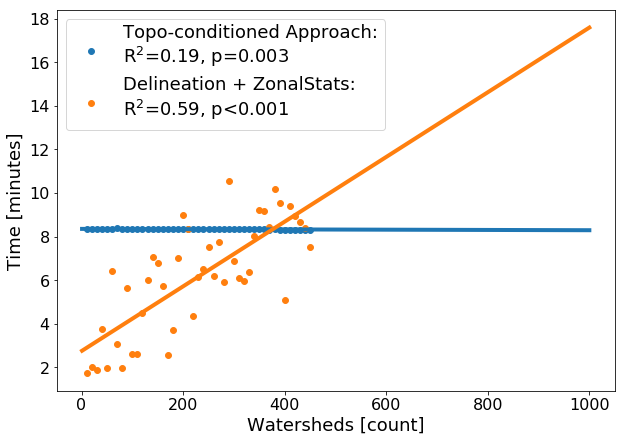

In [41]:
fs = (10,7)
cpgCol = '#1f77b4'
esriCol = '#ff7f0e'
size = 35
lw = 4

y1 = dat.cpg_time.values/60.
y2 = dat.esri_time.values/60.
x = dat.watersheds

yHat1 = (cpg.params[0] + cpg.params[1] * xs)/60.
yHat2 = (esri.params[0] + esri.params[1] * xs)/60.

fig = plt.figure(figsize=fs)
ax = fig.add_subplot(111)
ax.scatter(x,y1,s=size,label = 'Topo-conditioned Approach:\nR$^2$=%s, p=0.003'%cpg.rsquared.round(2),c=cpgCol)
ax.plot(xs,yHat1, c = cpgCol, lw = lw)

ax.scatter(x,y2,s=size,label = 'Delineation + ZonalStats:\nR$^2$=%s, p<0.001'%esri.rsquared.round(2), c = esriCol)
ax.plot(xs,yHat2, c = esriCol, lw = lw)

plt.legend(fontsize = 18)
plt.xlabel('Watersheds [count]', fontsize = 18)
plt.ylabel('Time [minutes]', fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.savefig('./figures/esri_vs_cpg.svg',bbox_inches='tight')